Note that most of the outliers (0.2) originated from blanks aka negative controls. What does this mean? Perhaps contaminations or those peaks were of very low intensities-concentrations and did not get ionised in a more complex sample (cultures). It could also be the case in this example because I only used one blank per media (3 samples in total) so when I upscale, this won't be an issue most likely.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc 

from collections import Counter
#from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.model_delection import ParameterGrid
from sklearn.datasets import load_iris
from sklearn import metrics

In [53]:
df= pd.read_csv("results/Requant/FeatureMatrix.tsv", sep="\t")
df= df.drop(columns="charge")
df["mz"]= df["mz"].astype(str)
df.columns= [col.replace(r'MDNAWGS', 'MDNA_WGS_') for col in df.columns]
df= df.sort_index(axis=1)
df.columns = df.columns.str.replace(r'_Plate-\d', '')
df= df.astype(float)
df= df.drop(columns="RT")

import re
#Split dataset for different conditions?
cols= df.columns
df[cols] = df[cols].replace({0:np.nan})
genome_ID_list =[r"NBC_?\d*", r"MDNA_WGS_?\d*"] #microorganism ID
media_list= [r"ISP2", r"FPY12", r"DNPM"] # 3 different media/conditions
for medium in media_list:
    for genome_ID in genome_ID_list:
        df_flt=df.filter(regex=fr"{medium}_{genome_ID}_rep(1|2|3)") #3 different replicates
        for i, row in df_flt.iterrows():
            if row.isna().sum()>=2: #in every 3xrep drop the NaN values if present in more than 2
                df.loc[[i],row.index] = np.nan

df=df.dropna(how="all")
df.to_csv("results/Requant/FeatureMatrixRepFlt.tsv", sep='\t', index = False)
df= df.set_index("mz")
df=df.transpose()
df=df.dropna(axis=1, how='all')
df = df.fillna(0)
df


/var/folders/c_/ysz9v_bd1yb7h3ymmkn6m199jbv7x7/T/ipykernel_66843/1566293900.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.



mz,489.25494,396.18720,359.23950,308.17114,239.13843,387.18690,351.16570,414.23404,346.22177,336.15490,...,465.23178,294.18057,382.24432,577.78230,457.22183,621.29380,707.87900,449.54047,364.18420,553.29504
DNPM_MDNA_WGS_14_blank,652974.20,191643.60,2042334.00,2365180.00,123069.0,27236.68,1.439768e+06,65667.62,354703.9,341531.3,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
DNPM_MDNA_WGS_14_rep1,256839.50,86121.01,38741.71,2259782.00,913240.1,74417.90,3.227684e+04,73182.89,2326838.0,362820.1,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
DNPM_MDNA_WGS_14_rep2,151520.20,158938.70,10947.06,1784322.00,786868.0,81241.59,6.251777e+03,106250.60,1965136.0,386449.8,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
DNPM_MDNA_WGS_14_rep3,79780.14,118689.00,13384.05,1825069.00,752350.0,32232.21,1.091917e+04,117478.60,2289526.0,397533.9,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
FPY12_MDNA_WGS_14_blank,36973.93,210583.50,36551.81,67544.91,1438382.0,517431.80,4.857680e+03,2162754.00,128328.8,27433.2,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
FPY12_MDNA_WGS_14_rep1,628200.20,650682.90,187921.50,412922.40,152461.8,6409671.00,3.688896e+04,1445479.00,1328491.0,2966245.0,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
FPY12_MDNA_WGS_14_rep2,339779.60,902076.10,117213.50,45230.80,234744.9,5605670.00,4.533699e+04,2395053.00,1452788.0,5143941.0,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
FPY12_MDNA_WGS_14_rep3,247363.30,1102605.00,180031.00,63598.06,405019.7,8509354.00,6.348808e+04,2948759.00,1626460.0,5806617.0,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00
ISP2_MDNA_WGS_14_blank,156607.50,79279.17,189583.80,561391.30,1170589.0,12110.62,2.804005e+04,95575.29,1604493.0,590870.7,...,26466.04,391400.4,712442.3,29450.51,5696.008,12736.5,24575.4,5939.3145,133498.9,32288.47
ISP2_MDNA_WGS_14_rep1,130316.80,32975.19,59839.03,373302.30,729176.8,78377.00,1.188517e+04,158581.60,2155313.0,252826.7,...,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.0000,0.0,0.00


In [16]:
DF=pd.read_csv("results/Requant/FeatureMatrixRepFlt.tsv", sep='\t')
blanks = [col for col in DF.columns if 'blank' in col]
DF= DF.drop(columns=blanks)
DF= DF.set_index("mz")
DF=DF.transpose()
DF=DF.dropna(axis=1, how='all')
DF = DF.fillna(0)
DF

mz,489.25494,396.18720,359.23950,308.17114,239.13843,387.18690,351.16570,414.23404,346.22177,336.15490,...,765.43390,1459.48020,843.45870,854.50420,841.43036,1000.85980,528.30240,1306.44290,831.91210,695.34174
DNPM_MDNA_WGS_14_rep1,256839.50,86121.01,38741.71,2259782.00,913240.1,74417.90,32276.8400,73182.89,2326838.0,362820.1,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
DNPM_MDNA_WGS_14_rep2,151520.20,158938.70,10947.06,1784322.00,786868.0,81241.59,6251.7773,106250.60,1965136.0,386449.8,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
DNPM_MDNA_WGS_14_rep3,79780.14,118689.00,13384.05,1825069.00,752350.0,32232.21,10919.1700,117478.60,2289526.0,397533.9,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
FPY12_MDNA_WGS_14_rep1,628200.20,650682.90,187921.50,412922.40,152461.8,6409671.00,36888.9600,1445479.00,1328491.0,2966245.0,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
FPY12_MDNA_WGS_14_rep2,339779.60,902076.10,117213.50,45230.80,234744.9,5605670.00,45336.9900,2395053.00,1452788.0,5143941.0,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
FPY12_MDNA_WGS_14_rep3,247363.30,1102605.00,180031.00,63598.06,405019.7,8509354.00,63488.0800,2948759.00,1626460.0,5806617.0,...,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00,0.00
ISP2_MDNA_WGS_14_rep1,130316.80,32975.19,59839.03,373302.30,729176.8,78377.00,11885.1700,158581.60,2155313.0,252826.7,...,328081.3,160504.40,14033.880,5852.0073,6678.139,243536.4,85088.88,0.0,0.00,0.00
ISP2_MDNA_WGS_14_rep2,83421.75,26509.98,40146.67,315790.40,671625.1,56833.34,26063.9000,154319.10,1779547.0,252482.6,...,0.0,0.00,8665.023,5480.1320,0.000,475040.1,67600.89,294773.2,498253.60,30148.16
ISP2_MDNA_WGS_14_rep3,138740.00,46461.70,34080.95,306980.40,642311.7,83616.76,15625.8800,185090.50,1406837.0,157942.0,...,209927.5,85273.19,0.000,0.0000,6773.270,0.0,0.00,253851.0,62670.66,12862.43


If I add missing value imputation algorithms, I am assuming that theses values missing should be there 

In [18]:
df.skew(axis=0, skipna = True) #explore if you have outliers - run unbiasted skew on any axis (axis= 0 : run skew on index rows per sample name aka the average normalised intensity of each sample)

mz
489.25494    1.370096
396.18720    1.481921
359.23950    3.375289
308.17114    0.816345
239.13843    0.345759
               ...   
621.29380    3.464102
707.87900    3.464102
449.54047    3.464102
364.18420    3.464102
553.29504    3.464102
Length: 8621, dtype: float64

In [19]:
DF.skew(axis=0, skipna = True) #explore if you have outliers - run unbiasted skew on any axis (axis= 0 : run skew on index rows per sample name aka the average normalised intensity of each sample)

mz
489.25494     1.756979
396.18720     1.080860
359.23950     0.947977
308.17114     0.867262
239.13843    -0.728846
                ...   
1000.85980    2.094744
528.30240     1.691616
1306.44290    1.650770
831.91210     2.914712
695.34174     2.285106
Length: 7426, dtype: float64

In [4]:
df.describe()

mz,489.25494,396.18720,359.23950,308.17114,239.13843,387.18690,351.16570,414.23404,346.22177,336.15490,...,465.23178,294.18057,382.24432,577.78230,457.22183,621.29380,707.87900,449.54047,364.18420,553.29504
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,...,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,241876.426667,3.005472e+05,2.458979e+05,8.650928e+05,6.683198e+05,1.790683e+06,1.434502e+05,8.256826e+05,1.534872e+06,1.390558e+06,...,2205.503333,32616.70000,59370.191667,2454.209167,474.667333,1061.375000,2047.950000,494.942875,11124.908333,2690.705833
std,204488.786530,3.701347e+05,5.698832e+05,9.077635e+05,3.990311e+05,3.115010e+06,4.086027e+05,1.093138e+06,6.926085e+05,2.063313e+06,...,7640.087659,112987.56315,205664.376844,8501.629938,1644.295876,3676.710852,7094.306903,1714.532413,38537.812926,9320.878423
min,36973.930000,2.650998e+04,1.094706e+04,4.523080e+04,1.230690e+05,1.211062e+04,4.857680e+03,6.566762e+04,1.283288e+05,2.743320e+04,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118593.037500,7.107480e+04,3.593410e+04,2.471215e+05,3.624510e+05,5.068306e+04,1.164367e+04,1.035818e+05,1.387250e+06,2.527407e+05,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,154063.850000,1.388139e+05,4.999285e+04,3.931123e+05,7.004009e+05,7.980929e+04,2.705197e+04,1.564504e+05,1.615476e+06,3.746349e+05,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,277574.525000,3.206083e+05,1.820036e+05,1.794509e+06,8.184610e+05,1.789491e+06,3.900097e+04,1.624798e+06,2.012680e+06,1.184714e+06,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,652974.200000,1.102605e+06,2.042334e+06,2.365180e+06,1.438382e+06,8.509354e+06,1.439768e+06,2.948759e+06,2.326838e+06,5.806617e+06,...,26466.040000,391400.40000,712442.300000,29450.510000,5696.008000,12736.500000,24575.400000,5939.314500,133498.900000,32288.470000


# Outlier definition
- In each column we check whether a compound is present (Intensity > 0) whilst absent in most rows (Intesity = 0).
- How many present vs absent(?). 
- Ratio 1:10.

In [27]:
dictionary = {}
for i, column in enumerate(df.columns):
    dictionary[i] = np.count_nonzero(df[column]) / len(df[column])
column_idx = [key for key, value in dictionary.items() if value <= 0.3]
print(column_idx)

[4410, 4700, 4706, 4733, 4738, 4742, 4754, 5074, 5108, 5109, 5137, 5140, 5142, 5158, 5182, 5194, 5196, 5221, 5240, 5254, 5257, 5271, 5274, 5283, 5304, 5307, 5315, 5319, 5332, 5335, 5343, 5378, 5407, 5416, 5419, 5434, 5436, 5439, 5457, 5465, 5466, 5469, 5470, 5474, 5491, 5492, 5508, 5511, 5529, 5542, 5547, 5557, 5558, 5561, 5563, 5598, 5604, 5612, 5614, 5620, 5621, 5622, 5627, 5633, 5646, 5647, 5651, 5652, 5655, 5670, 5673, 5880, 5882, 5885, 5887, 5888, 5889, 5891, 5896, 5897, 5900, 5901, 5902, 5903, 5904, 5905, 5907, 5910, 5912, 5913, 5917, 5918, 5920, 5921, 5924, 5926, 5927, 5929, 5933, 5935, 5938, 5942, 5944, 5946, 5947, 5949, 5951, 5952, 5957, 5958, 5960, 5961, 5963, 5967, 5971, 5973, 5975, 5976, 5977, 5981, 5988, 5991, 5995, 5997, 5998, 6000, 6005, 6006, 6008, 6009, 6011, 6012, 6015, 6016, 6020, 6024, 6027, 6028, 6037, 6038, 6044, 6045, 6055, 6056, 6059, 6060, 6061, 6065, 6066, 6067, 6068, 6071, 6074, 6075, 6076, 6077, 6078, 6079, 6081, 6082, 6083, 6085, 6087, 6088, 6090, 6091, 609

In [28]:
dictionary = {}
for i, column in enumerate(DF.columns):
    dictionary[i] = np.count_nonzero(DF[column]) / len(DF[column])
column_idx_noNCs = [key for key, value in dictionary.items() if value <= 0.3]
print(column_idx_noNCs)

[3904, 3928, 3973, 4003, 4011, 4046, 4118, 4140, 4403, 4409, 4411, 4422, 4425, 4426, 4440, 4449, 4452, 4465, 4471, 4475, 4486, 4492, 4495, 4497, 4501, 4507, 4512, 4514, 4520, 4522, 4525, 4532, 4540, 4543, 4546, 4576, 4589, 4592, 4598, 4600, 4619, 4631, 4636, 4637, 4641, 4644, 4647, 4653, 4656, 4657, 4663, 4669, 4685, 4712, 4714, 4725, 4736, 4746, 4750, 4779, 4868, 4910, 5067, 5068, 5070, 5071, 5078, 5080, 5081, 5084, 5086, 5087, 5089, 5090, 5094, 5104, 5106, 5109, 5116, 5117, 5121, 5127, 5128, 5130, 5139, 5140, 5146, 5151, 5161, 5162, 5165, 5177, 5183, 5185, 5186, 5190, 5193, 5194, 5195, 5201, 5205, 5207, 5211, 5212, 5216, 5218, 5223, 5224, 5225, 5228, 5235, 5236, 5238, 5241, 5248, 5250, 5251, 5260, 5263, 5266, 5267, 5276, 5277, 5278, 5280, 5283, 5284, 5294, 5296, 5298, 5302, 5305, 5306, 5310, 5311, 5312, 5322, 5324, 5325, 5327, 5329, 5330, 5332, 5347, 5348, 5350, 5398, 5404, 5408, 5460, 5475, 5491, 5531, 5553, 5556, 5570, 5578, 5607, 5616, 5625, 5636, 5637, 5645, 5675, 5684, 5723, 574

In [30]:
df_outliers= df.iloc[:, column_idx] #dataframe of outliers using iloc for the column index representing features that are present in less than 0.2% of the samples
df_outliers

mz,306.67618,496.28738,376.19730,666.38190,203.13829,492.24475,657.35657,369.18190,624.37120,373.69598,...,416.19534,581.80084,549.24603,906.99066,369.72850,753.88074,1148.55790,577.78230,457.22183,553.29504
DNPM_MDNA_WGS_14_blank,108985.4,1296395.00,5267.465,340903.1000,8.406198e+06,473224.20,35992.86,18292.89,2302807.0,172747.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
DNPM_MDNA_WGS_14_rep1,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,0.00,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
DNPM_MDNA_WGS_14_rep2,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,0.00,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
DNPM_MDNA_WGS_14_rep3,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,0.00,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
FPY12_MDNA_WGS_14_blank,246430.2,34545.59,1637174.000,121114.7000,5.243164e+03,89777.96,73343.44,0.00,302143.5,1593141.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
FPY12_MDNA_WGS_14_rep1,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,0.00,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
FPY12_MDNA_WGS_14_rep2,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,67823.61,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
FPY12_MDNA_WGS_14_rep3,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,68059.09,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00
ISP2_MDNA_WGS_14_blank,236085.6,3669651.00,12424.460,7958.8994,1.023801e+04,76760.58,38317.59,0.00,545479.4,113411.5,...,7689.574,41708.61,16145.29,6080.276,602001.5,1190528.0,208646.8,29450.51,5696.008,32288.47
ISP2_MDNA_WGS_14_rep1,0.0,0.00,0.000,0.0000,0.000000e+00,0.00,0.00,0.00,0.0,0.0,...,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.00,0.000,0.00


In [31]:
DF_outliers= DF.iloc[:, column_idx_noNCs] #dataframe of outliers using iloc for the column index representing features that are present in less than 0.2% of the samples
DF_outliers

mz,498.77080,527.29320,485.75415,341.16315,658.34230,851.41440,513.31384,711.34900,465.20618,525.74600,...,528.29395,765.43390,1459.48020,843.45870,854.50420,841.43036,1000.85980,528.30240,1306.44290,695.34174
DNPM_MDNA_WGS_14_rep1,0.00,20857.190,0.000,0.0,0.0000,0.00,0.000,0.0,0.0000,0.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
DNPM_MDNA_WGS_14_rep2,11516.48,8722.805,12698.650,0.0,0.0000,0.00,0.000,0.0,0.0000,0.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
DNPM_MDNA_WGS_14_rep3,17419.20,0.000,9694.529,0.0,0.0000,0.00,0.000,0.0,0.0000,0.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep1,0.00,0.000,0.000,724882.5,7481.7783,43538.78,0.000,704405.0,0.0000,0.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep2,0.00,0.000,0.000,929676.2,6903.2935,0.00,0.000,0.0,0.0000,4462318.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep3,0.00,0.000,0.000,0.0,0.0000,12813.13,0.000,1131572.0,0.0000,4741832.0,...,0.0000,0.0,0.00,0.000,0.0000,0.000,0.0,0.00,0.0,0.00
ISP2_MDNA_WGS_14_rep1,0.00,0.000,0.000,0.0,0.0000,0.00,6321.492,0.0,0.0000,0.0,...,8264.6455,328081.3,160504.40,14033.880,5852.0073,6678.139,243536.4,85088.88,0.0,0.00
ISP2_MDNA_WGS_14_rep2,0.00,0.000,0.000,0.0,0.0000,0.00,4998.117,0.0,3786.0938,0.0,...,0.0000,0.0,0.00,8665.023,5480.1320,0.000,475040.1,67600.89,294773.2,30148.16
ISP2_MDNA_WGS_14_rep3,0.00,0.000,0.000,0.0,0.0000,0.00,0.000,0.0,3882.5918,0.0,...,6510.5630,209927.5,85273.19,0.000,0.0000,6773.270,0.0,0.00,253851.0,12862.43


Remove the outliers that originate from blanks from df_outliers

In [32]:
df_blanks= df.filter(like='blank', axis=0)
print(df_blanks)
df= df_outliers.drop(index= [i for i in df_blanks.index])
print(df_blanks.index)
df= df.loc[:, (df != 0).any(axis=0)]
df

mz                       489.25494  396.18720   359.23950   308.17114  \
DNPM_MDNA_WGS_14_blank   652974.20  191643.60  2042334.00  2365180.00   
FPY12_MDNA_WGS_14_blank   36973.93  210583.50    36551.81    67544.91   
ISP2_MDNA_WGS_14_blank   156607.50   79279.17   189583.80   561391.30   

mz                       239.13843  387.18690   351.16570   414.23404  \
DNPM_MDNA_WGS_14_blank    123069.0   27236.68  1439768.00    65667.62   
FPY12_MDNA_WGS_14_blank  1438382.0  517431.80     4857.68  2162754.00   
ISP2_MDNA_WGS_14_blank   1170589.0   12110.62    28040.05    95575.29   

mz                       346.22177  336.15490  ...  465.23178  294.18057  \
DNPM_MDNA_WGS_14_blank    354703.9   341531.3  ...       0.00        0.0   
FPY12_MDNA_WGS_14_blank   128328.8    27433.2  ...       0.00        0.0   
ISP2_MDNA_WGS_14_blank   1604493.0   590870.7  ...   26466.04   391400.4   

mz                       382.24432  577.78230  457.22183  621.29380  \
DNPM_MDNA_WGS_14_blank         0.0    

mz,369.18190,563.77670,686.32733,438.16876,978.43970,730.29930,1189.71860,649.31866,493.26538,231.16960,...,833.37460,251.14966,374.14087,765.43390,1459.48020,843.45870,1000.85980,528.30240,1306.44290,695.34174
DNPM_MDNA_WGS_14_rep1,0.00,10683.70,11254.28,25881620.0,0.00,0.0,956052.4,0.00,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
DNPM_MDNA_WGS_14_rep2,0.00,0.00,22861.73,18923950.0,0.00,0.0,1118345.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
DNPM_MDNA_WGS_14_rep3,0.00,17545.34,0.00,19259820.0,0.00,0.0,850727.1,0.00,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep1,0.00,0.00,0.00,0.0,77668.66,219176.0,0.0,38794.92,0.0,0.00,...,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep2,67823.61,0.00,0.00,0.0,318142.70,238768.5,0.0,202645.10,126571.9,0.00,...,516528.4,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
FPY12_MDNA_WGS_14_rep3,68059.09,0.00,0.00,0.0,1389669.00,278480.3,0.0,19269.49,126299.2,0.00,...,586381.7,0.00,0.00,0.0,0.00,0.000,0.0,0.00,0.0,0.00
ISP2_MDNA_WGS_14_rep1,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,48047.58,...,0.0,54956.48,46714.70,328081.3,160504.40,14033.880,243536.4,85088.88,0.0,0.00
ISP2_MDNA_WGS_14_rep2,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,11025.78,...,0.0,0.00,28559.69,0.0,0.00,8665.023,475040.1,67600.89,294773.2,30148.16
ISP2_MDNA_WGS_14_rep3,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,16247.37,...,0.0,63951.54,0.00,209927.5,85273.19,0.000,0.0,0.00,253851.0,12862.43


/Users/eeko/opt/anaconda3/envs/pyopenms/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.



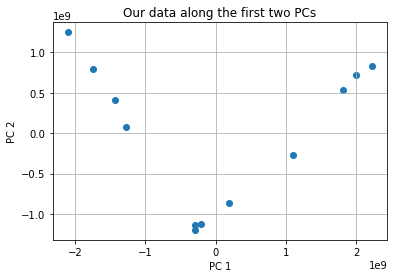

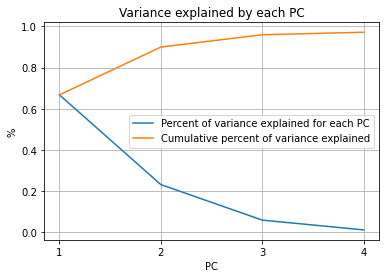

In [54]:
# So, as you know, the principle components of the data are the
# dimensions along which the data varies the most. The data
# here is 4 dimensional (since there are 4 features) and thus
# there are 4 total principle components.

# The first principle component will be the line along which the
# data varies the most. The second will be the line along with the
# data varies the second monst, and so on. The sum of the variances
# of all the principle components will be the entire variance of the
# dataset.

# Okay, so let's use the PCA function to get all 4 principle components.

# As always with the sklearn package, we first have to create and save
# a function "object":
pca = PCA(n_components=4)

# We can actually use this function object to get the first 4 principle
# components of any data. Let's do it for our data:
data_pca = pca.fit_transform(df)

# Now that we've called fit_transform, the pca object some attributes
# that includes the data points transformed along the principle components.
# So let's plot the data points along the first two principle components.
# We'll use the matplotlib.pyplot package to do this:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Our data along the first two PCs")
plt.grid(True)
plt.show()

# The explained variance is also included in the pca object.
# So we can plot that as well:
plt.plot(pca.explained_variance_ratio_,
        label="Percent of variance explained for each PC")
plt.plot([sum(pca.explained_variance_ratio_[:i]) for i in range(1, 5)],
        label="Cumulative percent of variance explained")
plt.legend()
plt.grid(True)
plt.xticks(range(4), ["%0.0f" % i for i in range(1, 5)])
plt.ylabel("%")
plt.xlabel("PC")
plt.title("Variance explained by each PC")
plt.show()

#make a plot where you zoom in
#volcano plots
# So now we see empirical evidence that the sum of all 4 variances
# equals the total variance in the data set (shown by the orange line) :)

In [34]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1

In [35]:
from scipy import stats
z = stats.zscore(df)
print(np.where(abs(z) > 3))

(array([], dtype=int64), array([], dtype=int64))


In [36]:
outlier_idx_1= df[df<(Q1-1.5*IQR)].index
outlier_idx_2= df[df>(Q3+1.5*IQR)].index
print(outlier_idx_1)
print(outlier_idx_2)

Index(['DNPM_MDNA_WGS_14_rep1', 'DNPM_MDNA_WGS_14_rep2',
       'DNPM_MDNA_WGS_14_rep3', 'FPY12_MDNA_WGS_14_rep1',
       'FPY12_MDNA_WGS_14_rep2', 'FPY12_MDNA_WGS_14_rep3',
       'ISP2_MDNA_WGS_14_rep1', 'ISP2_MDNA_WGS_14_rep2',
       'ISP2_MDNA_WGS_14_rep3'],
      dtype='object')
Index(['DNPM_MDNA_WGS_14_rep1', 'DNPM_MDNA_WGS_14_rep2',
       'DNPM_MDNA_WGS_14_rep3', 'FPY12_MDNA_WGS_14_rep1',
       'FPY12_MDNA_WGS_14_rep2', 'FPY12_MDNA_WGS_14_rep3',
       'ISP2_MDNA_WGS_14_rep1', 'ISP2_MDNA_WGS_14_rep2',
       'ISP2_MDNA_WGS_14_rep3'],
      dtype='object')


#### Interactive plots PCA

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as tls

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [44]:
df= pd.read_csv("results/Requant/FeatureMatrixRepFlt.tsv", sep="\t")
df.columns= [col.replace( r'MDNAWGS', 'MDNA_WGS_') for col in df.columns]
df= df.sort_index(axis=1)
df.columns = df.columns.str.replace(r'_Plate-\d', '')
df= df.astype(float)
cols= df.columns

#df[cols] = df[cols].replace({0:np.nan})
target= df["mz"]

df0 =df.set_index("mz")
df0=df0.transpose()
df0= df0.fillna(0)
df0

/var/folders/c_/ysz9v_bd1yb7h3ymmkn6m199jbv7x7/T/ipykernel_66843/3212943004.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



mz,489.25494,396.18720,359.23950,308.17114,239.13843,387.18690,351.16570,414.23404,346.22177,336.15490,...,951.47784,670.82250,956.89890,166.08570,547.25230,729.37490,641.36120,684.33820,868.39465,604.29285
DNPM_MDNA_WGS_14_blank,652974.20,191643.60,2042334.00,2365180.00,123069.0,27236.68,1.439768e+06,65667.62,354703.9,341531.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNPM_MDNA_WGS_14_rep1,256839.50,86121.01,38741.71,2259782.00,913240.1,74417.90,3.227684e+04,73182.89,2326838.0,362820.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNPM_MDNA_WGS_14_rep2,151520.20,158938.70,10947.06,1784322.00,786868.0,81241.59,6.251777e+03,106250.60,1965136.0,386449.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNPM_MDNA_WGS_14_rep3,79780.14,118689.00,13384.05,1825069.00,752350.0,32232.21,1.091917e+04,117478.60,2289526.0,397533.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FPY12_MDNA_WGS_14_blank,36973.93,210583.50,36551.81,67544.91,1438382.0,517431.80,4.857680e+03,2162754.00,128328.8,27433.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FPY12_MDNA_WGS_14_rep1,628200.20,650682.90,187921.50,412922.40,152461.8,6409671.00,3.688896e+04,1445479.00,1328491.0,2966245.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FPY12_MDNA_WGS_14_rep2,339779.60,902076.10,117213.50,45230.80,234744.9,5605670.00,4.533699e+04,2395053.00,1452788.0,5143941.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FPY12_MDNA_WGS_14_rep3,247363.30,1102605.00,180031.00,63598.06,405019.7,8509354.00,6.348808e+04,2948759.00,1626460.0,5806617.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP2_MDNA_WGS_14_blank,156607.50,79279.17,189583.80,561391.30,1170589.0,12110.62,2.804005e+04,95575.29,1604493.0,590870.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP2_MDNA_WGS_14_rep1,130316.80,32975.19,59839.03,373302.30,729176.8,78377.00,1.188517e+04,158581.60,2155313.0,252826.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Interactive PCA plots inspired from https://www.kaggle.com/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne

In [45]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = df0.values
X_std = StandardScaler().fit_transform(X)
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_mat) #ASK
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [46]:
trace1 = go.Scatter(
    x=list(range(10)),
    y= cum_var_exp,
    mode='lines+markers',
    hoverinfo= "all",
    name="'Cumulative Explained Variance'",
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(10)),
    y= var_exp,
    hoverinfo= "all",
    mode='lines+markers',
    name="'Individual Explained Variance'",
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.xaxis = dict(range=[0, 9.5])
fig.layout.yaxis = dict(range=[0, 110])

py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [47]:

X= df0.values

# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 50 components. 
pca = PCA(n_components=10)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = target

In [48]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = "Target",
    hoverinfo = 'all',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'PCA (Principal Component Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [9123] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


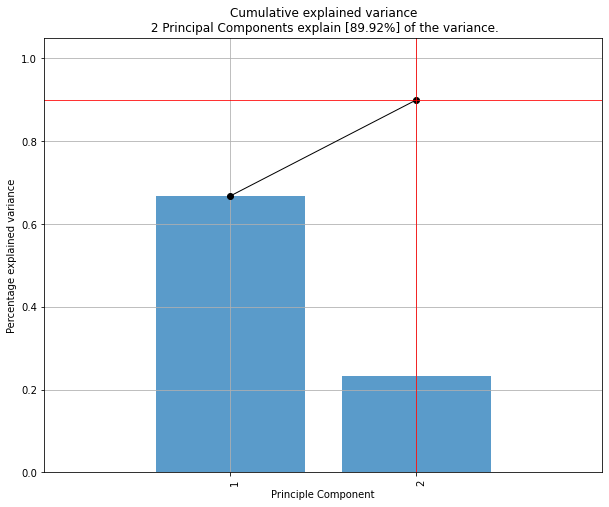

<Figure size 432x288 with 0 Axes>

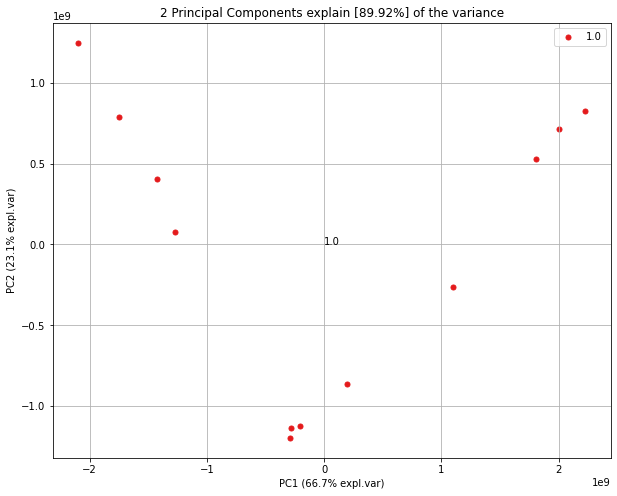

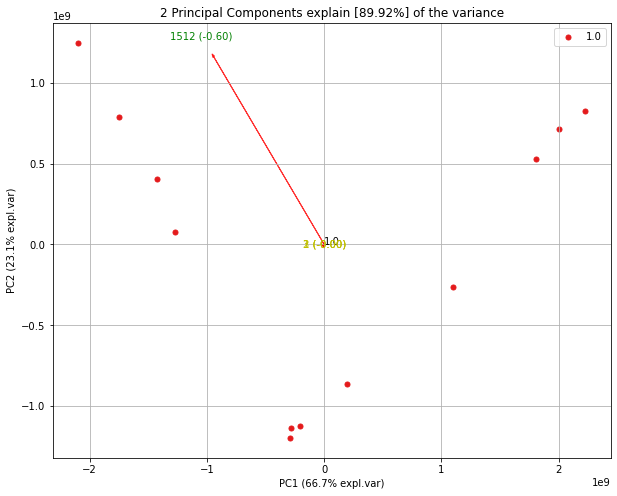

In [49]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)